Task 5: Decision Trees and Random Forests

In [ ]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# load dataset

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [3]:
# Train/Test split 

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Decision Tree Classifier

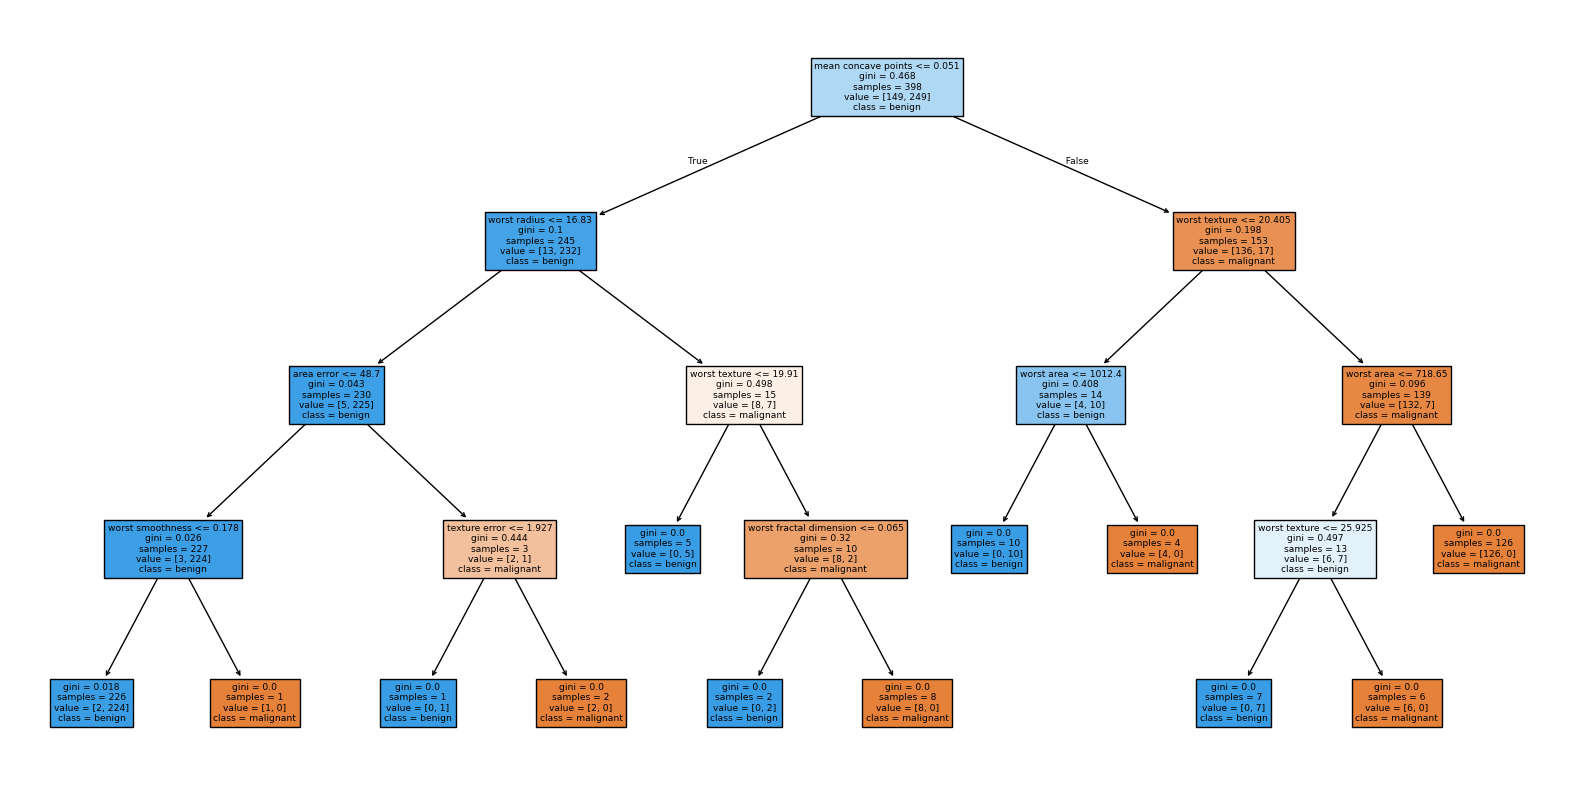

In [ ]:
# train and visulize decision tree

dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.show()


In [ ]:
# visualize decision tree

y_pred = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.9532163742690059
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [7]:
# cross validation  

cv_scores = cross_val_score(dtree, X, y, cv=5)
print("CV Accuracy (Decision Tree):", np.mean(cv_scores))




CV Accuracy (Decision Tree): 0.9208818506443098


Random Forest Classifier

In [9]:
# Train & evaluate random forest  

rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)

y_pred_rf = rforest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [10]:
# cross validation  

rf_cv_scores = cross_val_score(rforest, X, y, cv=5)
print("CV Accuracy (Random Forest):", np.mean(rf_cv_scores))


CV Accuracy (Random Forest): 0.9560937742586555


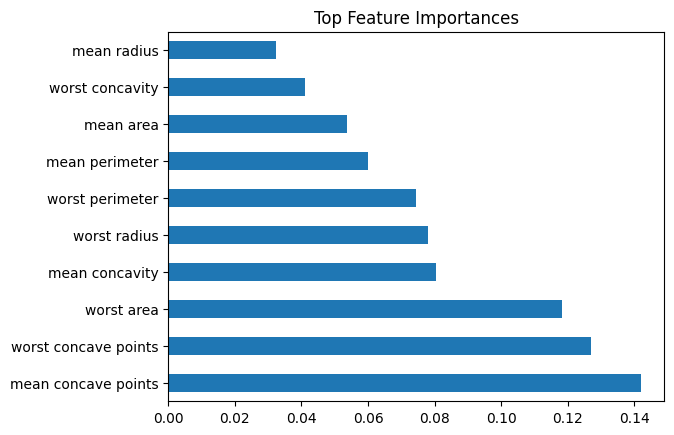

In [11]:
# feature importance 

importances = rforest.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top Feature Importances")
plt.show()
